# Problem 1

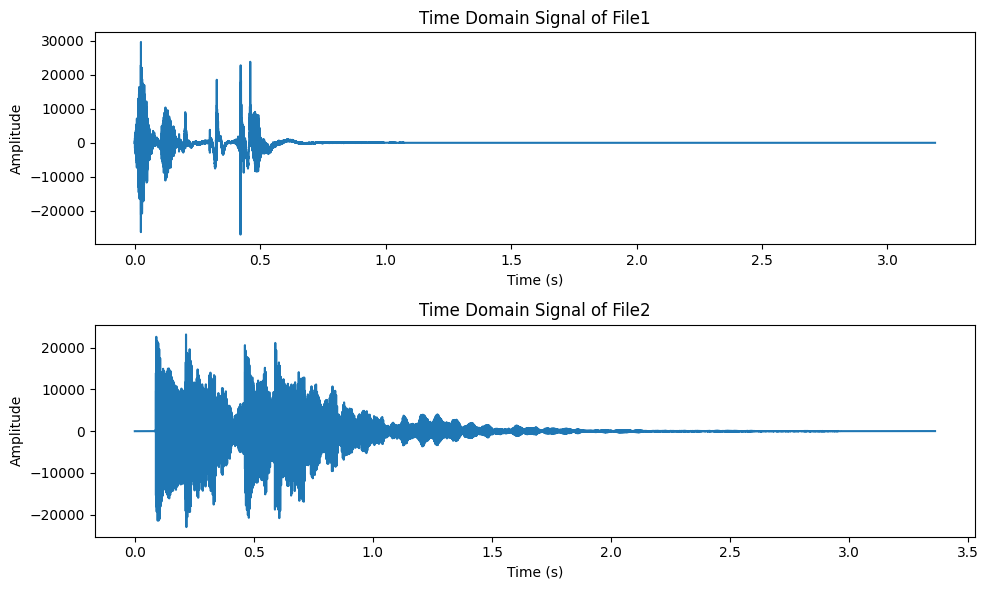

In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

rate1, data1 = wavfile.read('file1.wav')
rate2, data2 = wavfile.read('file2.wav')

if len(data1.shape) > 1:
    data1 = np.mean(data1, axis=1)

if len(data2.shape) > 1:
    data2 = np.mean(data2, axis=1)

time1 = np.linspace(0, len(data1) / rate1, num=len(data1))
time2 = np.linspace(0, len(data2) / rate2, num=len(data2))

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time1, data1)
plt.title('Time Domain Signal of File1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time2, data2)
plt.title('Time Domain Signal of File2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


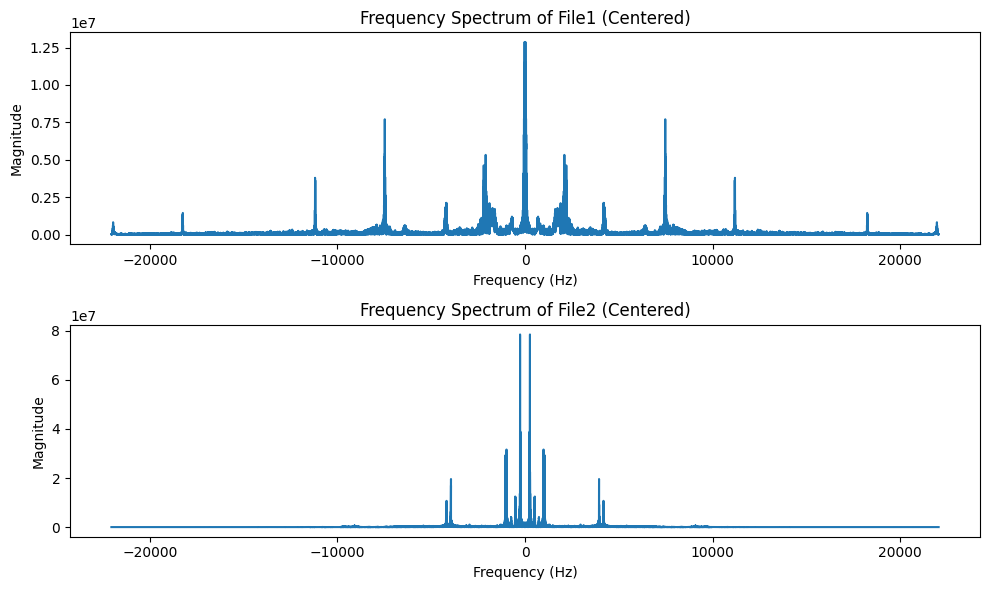

In [3]:
fft_data1 = np.fft.fft(data1)
fft_data2 = np.fft.fft(data2)

freqs1 = np.fft.fftfreq(len(data1), 1/rate1)
freqs2 = np.fft.fftfreq(len(data2), 1/rate2)

fft_data1_shifted = np.fft.fftshift(fft_data1)
fft_data2_shifted = np.fft.fftshift(fft_data2)
freqs1_shifted = np.fft.fftshift(freqs1)
freqs2_shifted = np.fft.fftshift(freqs2)

magnitude1_shifted = np.abs(fft_data1_shifted)
magnitude2_shifted = np.abs(fft_data2_shifted)

plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(freqs1_shifted, magnitude1_shifted)
plt.title('Frequency Spectrum of File1 (Centered)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(freqs2_shifted, magnitude2_shifted)
plt.title('Frequency Spectrum of File2 (Centered)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


File1 Dominant Frequencies (Hz):
1st dominant frequency: 22.88 Hz
2st dominant frequency: 7476.18 Hz
3st dominant frequency: 2098.12 Hz

File2 Dominant Frequencies (Hz):
1st dominant frequency: 263.35 Hz
2st dominant frequency: 987.03 Hz
3st dominant frequency: 3946.33 Hz


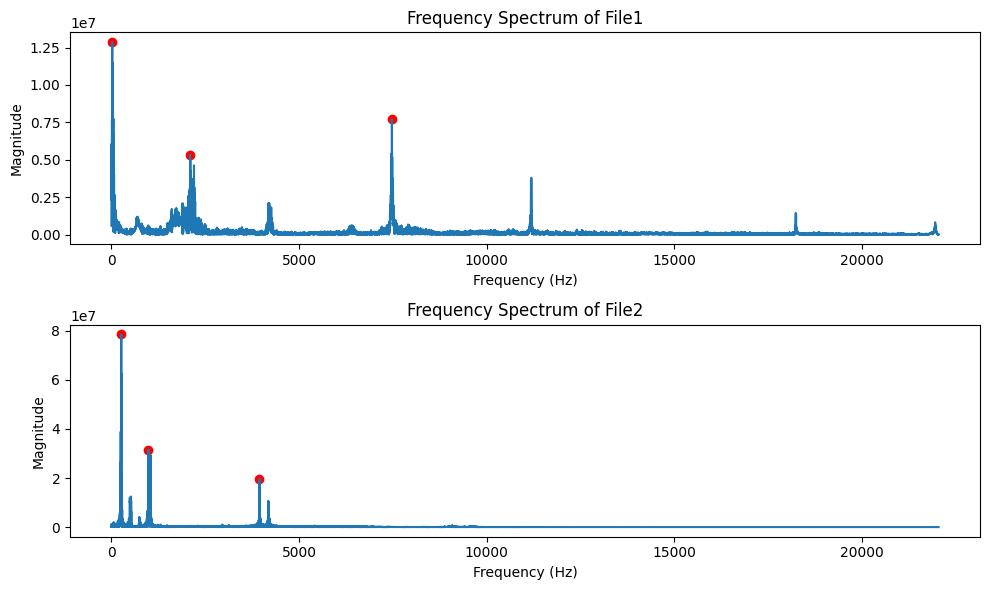

In [4]:
from scipy.signal import find_peaks

fft_data1 = np.fft.fft(data1)
fft_data2 = np.fft.fft(data2)

freqs1 = np.fft.fftfreq(len(data1), 1/rate1)
freqs2 = np.fft.fftfreq(len(data2), 1/rate2)

magnitude1 = np.abs(fft_data1)
magnitude2 = np.abs(fft_data2)

positive_freqs1 = freqs1[:len(freqs1)//2]
positive_magnitude1 = magnitude1[:len(magnitude1)//2]

positive_freqs2 = freqs2[:len(freqs2)//2]
positive_magnitude2 = magnitude2[:len(magnitude2)//2]

positive_magnitude1 = np.squeeze(positive_magnitude1)
positive_magnitude2 = np.squeeze(positive_magnitude2)

distance_between_peaks = len(positive_magnitude1) // 100
peaks1, _ = find_peaks(positive_magnitude1, distance=distance_between_peaks)
peaks2, _ = find_peaks(positive_magnitude2, distance=distance_between_peaks)

# With out distances
# peaks1, _ = find_peaks(positive_magnitude1)
# peaks2, _ = find_peaks(positive_magnitude2)

peak_freqs_file1 = positive_freqs1[peaks1]
peak_magnitude_file1 = positive_magnitude1[peaks1]

peak_freqs_file2 = positive_freqs2[peaks2]
peak_magnitude_file2 = positive_magnitude2[peaks2]

top3_indices_file1 = np.argsort(peak_magnitude_file1)[-3:][::-1]
top3_indices_file2 = np.argsort(peak_magnitude_file2)[-3:][::-1]

top3_freqs_file1 = peak_freqs_file1[top3_indices_file1]
top3_magnitudes_file1 = peak_magnitude_file1[top3_indices_file1]

top3_freqs_file2 = peak_freqs_file2[top3_indices_file2]
top3_magnitudes_file2 = peak_magnitude_file2[top3_indices_file2]

print(f"File1 Dominant Frequencies (Hz):")
for i, freq in enumerate(top3_freqs_file1):
    print(f"{i+1}st dominant frequency: {freq:.2f} Hz")

print(f"\nFile2 Dominant Frequencies (Hz):")
for i, freq in enumerate(top3_freqs_file2):
    print(f"{i+1}st dominant frequency: {freq:.2f} Hz")


plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(positive_freqs1, positive_magnitude1)
plt.scatter(top3_freqs_file1, top3_magnitudes_file1, color='red')
plt.title('Frequency Spectrum of File1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs2, positive_magnitude2)
plt.scatter(top3_freqs_file2, top3_magnitudes_file2, color='red')
plt.title('Frequency Spectrum of File2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


# Problem 2

In [5]:
import json

with open('params.json', 'r') as file:
    params = json.load(file)

a1 = params['a1']
a2 = params['a2']
a3 = params['a3']
n1 = params['n1']
n2 = params['n2']

print(f"a1: {a1}, a2: {a2}, a3: {a3}, n1: {n1}, n2: {n2}")


a1: -3, a2: -1, a3: 2, n1: -3, n2: -3


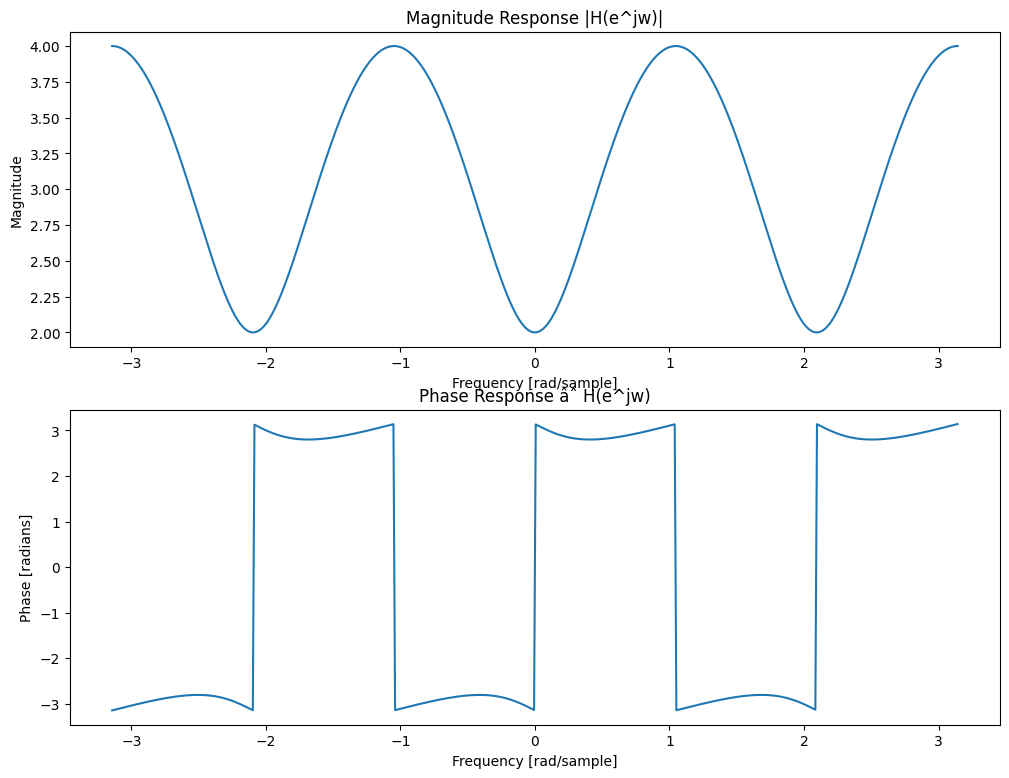

In [6]:
omega = np.linspace(-np.pi, np.pi, 512)
H = a1 + a2 * np.exp(-1j * omega * n1) + a3 * np.exp(-1j * omega * n2)

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(H))
plt.title('Magnitude Response |H(e^jw)|')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(H))
plt.title('Phase Response âˆ H(e^jw)')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Phase [radians]')
plt.show()


[-16 -13  -8   3  -4   0  -8  -3  -5   0]
[-54.         -0.j         -20.82623792 +2.43689772j
 -13.20820393+21.45802805j  -5.17376208+10.3228644j
   0.20820393 +1.43284064j -28.         -0.j
   0.20820393 -1.43284064j  -5.17376208-10.3228644j
 -13.20820393-21.45802805j -20.82623792 -2.43689772j]


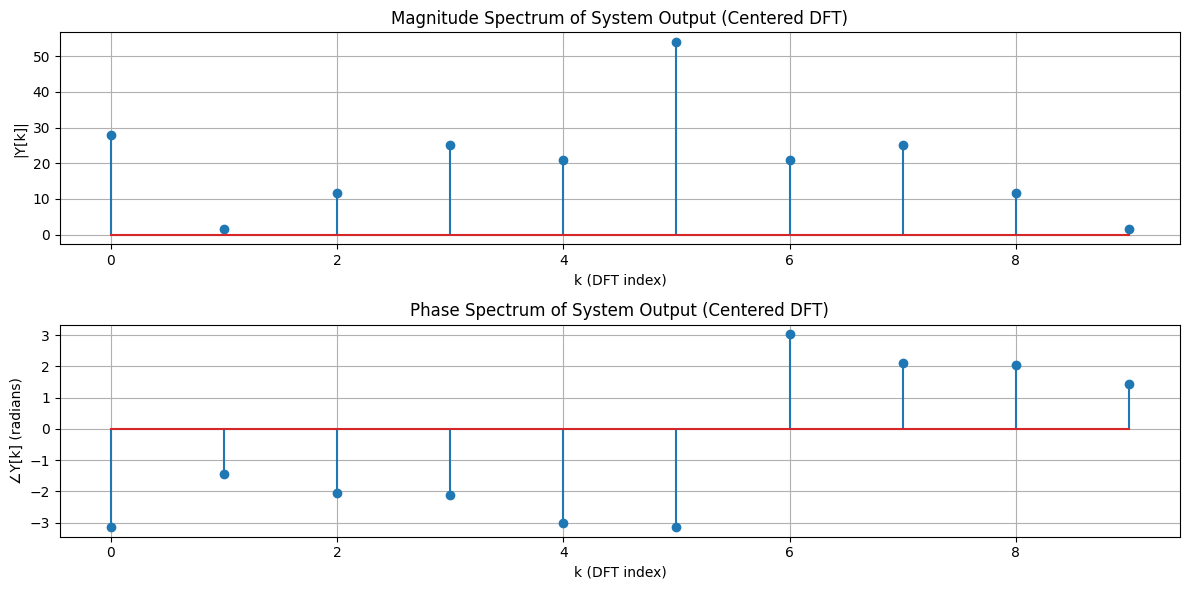

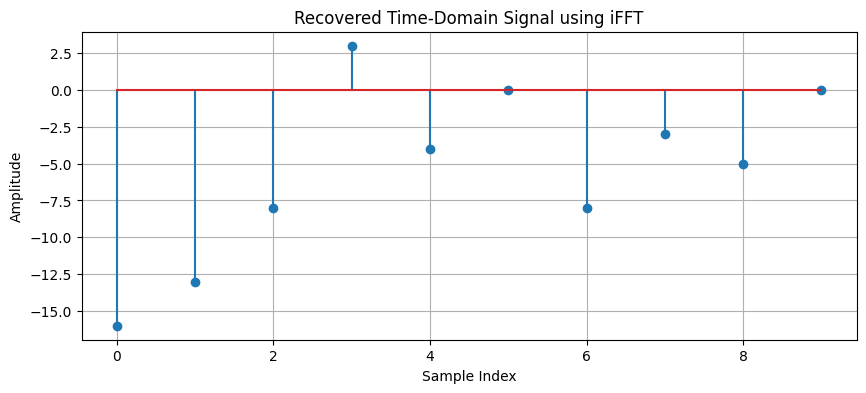

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, ifft

x = np.array([6, 5, 3, 1, 3, 1, 3, 2, 2, 1])


N = len(x)
x_padded = np.concatenate([x, np.zeros(3)])

y = a1 * x + a2 * np.roll(x, N-n1) + a3 * np.roll(x, N-n2)
print(y)

Y = fft(y)
print(Y)
Y_shifted = fftshift(Y)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(np.abs(Y_shifted))
plt.title('Magnitude Spectrum of System Output (Centered DFT)')
plt.xlabel('k (DFT index)')
plt.ylabel('|Y[k]|')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(np.angle(Y_shifted))
plt.title('Phase Spectrum of System Output (Centered DFT)')
plt.xlabel('k (DFT index)')
plt.ylabel('∠Y[k] (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()


y_recovered = ifft(Y)
plt.figure(figsize=(10, 4))
plt.stem(np.real(y_recovered)) 
plt.title('Recovered Time-Domain Signal using iFFT')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()